<h1>Bài 5 _ Thực hành

<h4>(Lập trình) Dựa trên dữ liệu MNIST5 đã được làm quen ở bài thực hành trước. Sinh viên hãy thực hiện thao tác gom cụm bằng thuật toán k-Means. Sau đó so sánh kết quả gom cụm và nhãn lớp có sẵn của dữ liệu này.

<H3>Import các thư viện cần thiết

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import datasets,tree,metrics

<h3>Download dữ liệu có sẵn trong thư viện sklearn

In [15]:
digits = datasets.load_digits()

<h3>Biểu diễn 4 mẫu dữ liệu huấn luyện tương ứng với 4 lớp 0, 1, 2, 3

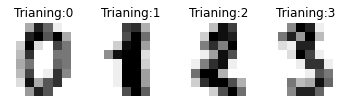

In [16]:
_, axes =plt.subplots(1,4)
images_and_labels = list(zip(digits.images,digits.target))
for ax,(image,label) in zip(axes,images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Trianing:%i'% label)
plt.show()

<h3>Chuyển đổi mỗi đối tượng hình ảnh – ma trận 8x8 thành ma trận 1x64 để thỏa yêu cầu đầu vào của thuật toán.

In [17]:
n_samples=len(digits.images)
data = digits.images.reshape((n_samples,-1))

<h3>Tiến hành gom cụm dữ liệu MNIST thành 10 nhóm

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [19]:
algorithm = KMeans(n_clusters = 10, init = 'random')

<h3>Chia dữ liệu thành hai phần: huấn luyện 80%, kiểm thử 20%

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)

<h3>Tiến hành gom cụm dữ liệu 

In [21]:
algorithm.fit(x_train,y_train)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

<h3>Dự đoán nhãn dữ liệu cho tập kiểm thử

In [22]:
predicted = algorithm.predict(x_test)

<h3>Biểu diễn một vài kết quả dự đoán

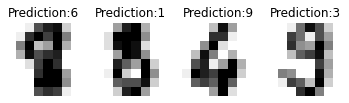

In [23]:
_, axes =plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples//2:],predicted))
for ax,(image,prediction) in zip(axes,images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Prediction:%i'% prediction)
plt.show()

<h3>Thông số đạt được 

In [26]:
print("Clustering report for cluster %s:\n%s\n"%(algorithm,metrics.classification_report(y_test,predicted)))

Clustering report for cluster KMeans(init='random', n_clusters=10):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        35
           3       0.02      0.03      0.02        37
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        36
           8       0.31      0.52      0.39        33
           9       0.00      0.00      0.00        37

    accuracy                           0.14       360
   macro avg       0.13      0.15      0.14       360
weighted avg       0.13      0.14      0.13       360


